#### Course Recommendation System using Udemy Dataset

#### Algo
+ Cosine Similarity
+ ML Models


#### Workflow
+ Dataset
+ Vectorized our dataset
+ Cosine Similarity Matrix
+ ID,Score
+ Train ML Model
+ Recommend


In [1]:
# Load EDA Pkgs
import pandas as pd
import neattext.functions as nfx

In [3]:
# Load our dataset
df = pd.read_csv("Courses_rec.csv")

In [4]:
df.head(10)

,course_title,course_field,diff_level
0,Data Engineer,School of Data Science,Intermediate
1,Data Scientist,School of Data Science,Advanced
2,Data Analyst,School of Data Science,Intermediate
3,C++,School of Autonomous Systems,Intermediate
4,Product Manager,School of Product Management,Beginner
5,Business Analytics,School of Business,Beginner
6,Introduction to Programming,School of Programming & Development,Beginner
7,Digital Marketing,School of Business,Beginner
8,Deep Learning,School of Artificial Intelligence,Intermediate
9,Blockchain Developer,School of Programming & Development,Intermediate


In [5]:
df['course_title']

0                                           Data Engineer
1                                          Data Scientist
2                                            Data Analyst
3                                                     C++
4                                         Product Manager
                              ...                        
3936    Learn jQuery from Scratch - Master of JavaScri...
3937    How To Design A WordPress Website With No Codi...
3938                        Learn and Build using Polymer
3939    CSS Animations: Create Amazing Effects on Your...
3940    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3941, dtype: object

#  Data Cleaning & Preparing

In [6]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [7]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [8]:
df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Data Engineer,Data Engineer
1,Data Scientist,Data Scientist
2,Data Analyst,Data Analyst
3,C++,C
4,Product Manager,Product Manager
...,...,...
3936,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3937,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3938,Learn and Build using Polymer,Learn Build Polymer
3939,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


#  Building Victorizer and Cosine Similarty Matrix For Courses Title

In [11]:
# Load ML/Rc Pkgs
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [12]:
# Vectorize our Text
vect = TfidfVectorizer()
cv_mat = vect.fit_transform(df['clean_course_title'])

In [13]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=vect.get_feature_names())

In [14]:
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)

In [16]:
cosine_sim_mat

array([[1.        , 0.36448689, 0.40875416, ..., 0.        , 0.        ,
        0.        ],
       [0.36448689, 1.        , 0.34747136, ..., 0.        , 0.        ,
        0.        ],
       [0.40875416, 0.34747136, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.12063291],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12063291, 0.        ,
        1.        ]])

#  Calculate Cosine similarty

In [17]:
# Get Course ID/Index
course_indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [18]:
print(course_indices)
type(course_indices)

course_title
Data Engineer                                                  0
Data Scientist                                                 1
Data Analyst                                                   2
C++                                                            3
Product Manager                                                4
                                                            ... 
Learn jQuery from Scratch - Master of JavaScript library    3936
How To Design A WordPress Website With No Coding At All     3937
Learn and Build using Polymer                               3938
CSS Animations: Create Amazing Effects on Your Website      3939
Using MODX CMS to Build Websites: A Beginner's Guide        3940
Length: 3941, dtype: int64


pandas.core.series.Series

#  Feature Extraction & Model Traning

In [19]:
df['course_field'].value_counts()

Web Development                        1200
Business Finance                       1195
Musical Instruments                     680
Graphic Design                          603
School of Programming & Development     143
School of Artificial Intelligence        42
School of Business                       16
School of Data Science                   15
School of Product Management             13
Career Advancement                       11
School of Autonomous Systems             10
School of Cloud Computing                 9
School of Cybersecurity                   4
Name: course_field, dtype: int64

In [20]:
#plt.scatter(df.course_field,df.course_title)

In [21]:
import time
from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
x_train, x_test, y_train, y_test = train_test_split(cv_mat, df['course_field'], random_state=42, test_size=0.2)


In [23]:
def train_models(X_train,Y_train,X_test,Y_test):
    
    print('---------------------Start Training-------------------------------')
    
    start_time = time.time()
    
    # Define models to train
    
    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
             "Naive Bayes", "SVM Linear"]

    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(solver='lbfgs', max_iter=1000),
        SGDClassifier(max_iter = 100),
        MultinomialNB(),
        SVC(kernel = 'linear')
    ]

    models = zip(names, classifiers)
    
    scored_models=dict()

    for name, model in models:
        nltk_model = model
        nltk_model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        scored_models[name]=[model,pred]
        score=f1_score(Y_test, pred,average='micro')
        accuracy = accuracy_score(Y_test,pred) 
        print(name,"had Trained and it's Accuracy: ", accuracy," and it's Score: ",score)

    print('---------------------End of Training-------------------------------')
    
    print("-------- ",(time.time() - start_time),' Secounds --------')
    
    return scored_models

In [24]:
trained_models=train_models(X_train=x_train,Y_train=y_train,X_test=x_test,Y_test=y_test)


---------------------Start Training-------------------------------
K Nearest Neighbors had Trained and it's Accuracy:  0.49302915082382764  and it's Score:  0.49302915082382764
Decision Tree had Trained and it's Accuracy:  0.844106463878327  and it's Score:  0.844106463878327
Random Forest had Trained and it's Accuracy:  0.8770595690747782  and it's Score:  0.8770595690747782
Logistic Regression had Trained and it's Accuracy:  0.8694550063371356  and it's Score:  0.8694550063371356
SGD Classifier had Trained and it's Accuracy:  0.9138149556400507  and it's Score:  0.9138149556400506
Naive Bayes had Trained and it's Accuracy:  0.8517110266159695  and it's Score:  0.8517110266159695
SVM Linear had Trained and it's Accuracy:  0.8973384030418251  and it's Score:  0.8973384030418251
---------------------End of Training-------------------------------
--------  4.885449647903442  Secounds --------


#  Test Model Against Real Data

In [25]:
course_name='Trading Options Basics'

In [26]:
result = trained_models['Naive Bayes'][0].predict(vect.transform([course_name]))

In [27]:
print('This Course Is ->',result[0],'<-Course')

This Course Is -> Business Finance <-Course


#  Recommend Top-N Courses 

In [28]:
def recommend_course(title,field,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recommend
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]

    result = {'Course':df['course_title'].iloc[selected_course_indices[0:]],'Field':df['course_field'].iloc[selected_course_indices[0:]]}
    rec_df = pd.DataFrame(result)
    dd=rec_df.loc[rec_df.Field == field]

    return dd.head(num_of_rec) 
    

In [29]:
recommend_course(course_name,result[0],20)

,Course,Field
358,Options Trading 101: The Basics,Business Finance
1124,Basics of Trading,Business Finance
456,Trading Options For Consistent Returns: Option...,Business Finance
1063,Trading: Basics of Trading for Beginners,Business Finance
1072,Learn Call Options and Put Options - Introduct...,Business Finance
1216,Options Basics & Trading With Small Capital! -...,Business Finance
329,Options Trading Basics (3-Course Bundle),Business Finance
999,Advanced Options Trading Course,Business Finance
396,Forex Trading for Beginners - Basics,Business Finance
357,Intermediate Options trading concepts for Stoc...,Business Finance


#  Deep Learning Model 

In [67]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer


In [103]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100


In [72]:
df.head()

,course_title,course_field,diff_level,clean_course_title
0,Data Engineer,School of Data Science,Intermediate,Data Engineer
1,Data Scientist,School of Data Science,Advanced,Data Scientist
2,Data Analyst,School of Data Science,Intermediate,Data Analyst
3,C++,School of Autonomous Systems,Intermediate,C
4,Product Manager,School of Product Management,Beginner,Product Manager


In [80]:
tokenizer=Tokenizer()
txt=df['clean_course_title'].values
tokenizer.fit_on_texts(txt)
X = tokenizer.texts_to_sequences(txt)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3941, 250)


In [94]:
Y = pd.get_dummies(df['course_field']).values
print(Y)
print('Shape of label tensor:', Y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
Shape of label tensor: (3941, 13)


In [95]:
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, Y, random_state=20, test_size=0.2)
print(x_train_nn.shape,y_train_nn.shape)
print(x_test_nn.shape,y_test_nn.shape)

(3152, 250) (3152, 13)
(789, 250) (789, 13)


In [96]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_13 (Dense)            (None, 13)                1313      
                                                                 
Total params: 5,081,713
Trainable params: 5,081,713
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
epochs = 5
batch_size = 64

history = model.fit(x_train_nn, y_train_nn, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
45/45 [==============================] - 23s 419ms/step - loss: 1.8034 - accuracy: 0.3039 - val_loss: 1.6390 - val_accuracy: 0.3165
Epoch 2/5
45/45 [==============================] - 24s 528ms/step - loss: 1.4594 - accuracy: 0.5056 - val_loss: 1.2651 - val_accuracy: 0.6424
Epoch 3/5
45/45 [==============================] - 22s 479ms/step - loss: 0.7932 - accuracy: 0.8128 - val_loss: 0.6305 - val_accuracy: 0.8386
Epoch 4/5
45/45 [==============================] - 26s 569ms/step - loss: 0.3857 - accuracy: 0.9080 - val_loss: 0.4534 - val_accuracy: 0.8766
Epoch 5/5
45/45 [==============================] - 23s 503ms/step - loss: 0.2674 - accuracy: 0.9341 - val_loss: 0.4031 - val_accuracy: 0.8734


In [98]:
accr = model.evaluate(x_test_nn,y_test_nn)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

25/25 [==============================] - 2s 65ms/step - loss: 0.3543 - accuracy: 0.8961
Test set
  Loss: 0.354
  Accuracy: 0.896


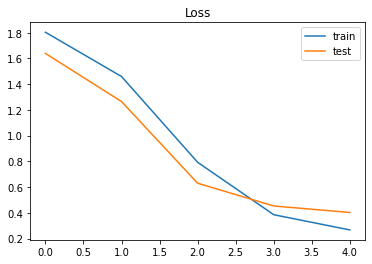

In [99]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

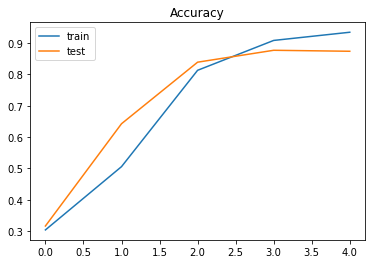

In [102]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();